# Iris Dataset Classification

In [8]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
plt.style.use('seaborn')
sns.set(style='white', color_codes=True)
%matplotlib inline

In [9]:
iris = datasets.load_iris()

In [10]:
df = pd.DataFrame(np.c_[iris['data'], iris['target']], columns= ['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth', 'species'])

In [11]:
df.head()

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [12]:
df.describe()

,sepalLength,sepalWidth,petalLength,petalWidth,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [13]:
df['species'].value_counts()

2.0    50
1.0    50
0.0    50
Name: species, dtype: int64

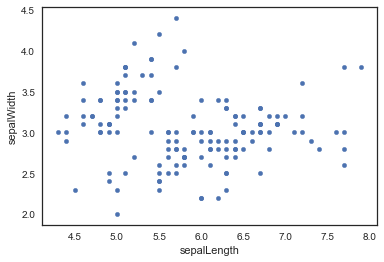

In [14]:
df.plot(kind='scatter', x='sepalLength', y='sepalWidth')

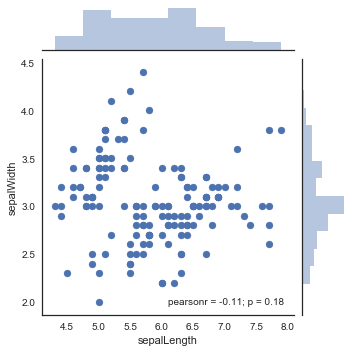

In [15]:
sns.jointplot(x='sepalLength', y='sepalWidth', data=df, size=5)

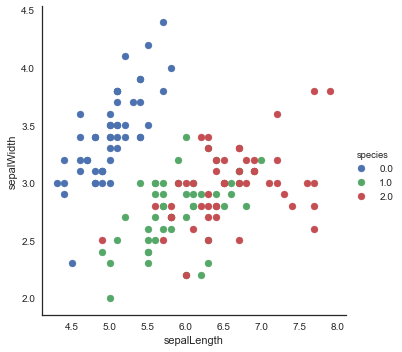

In [16]:
sns.FacetGrid(df, hue='species', size=5).map(plt.scatter, 'sepalLength', 'sepalWidth').add_legend()

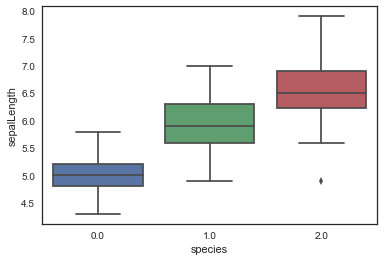

In [17]:
sns.boxplot(x='species', y='sepalLength', data=df)

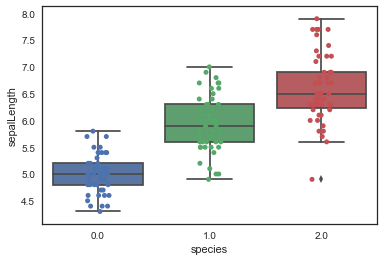

In [18]:
ax = sns.boxplot(x='species', y='sepalLength', data=df)
ax = sns.stripplot(x='species', y='sepalLength', data=df, jitter=True, edgecolor='grey')

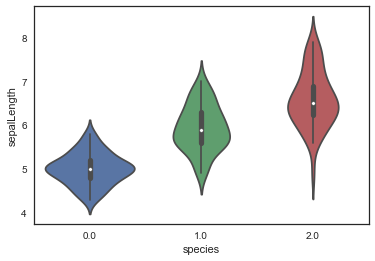

In [19]:
sns.violinplot(x='species', y='sepalLength', data=df, size=6)

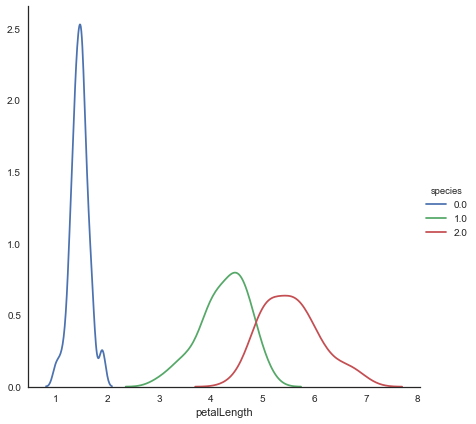

In [20]:
sns.FacetGrid(df, hue='species', size=6).map(sns.kdeplot, 'petalLength').add_legend()

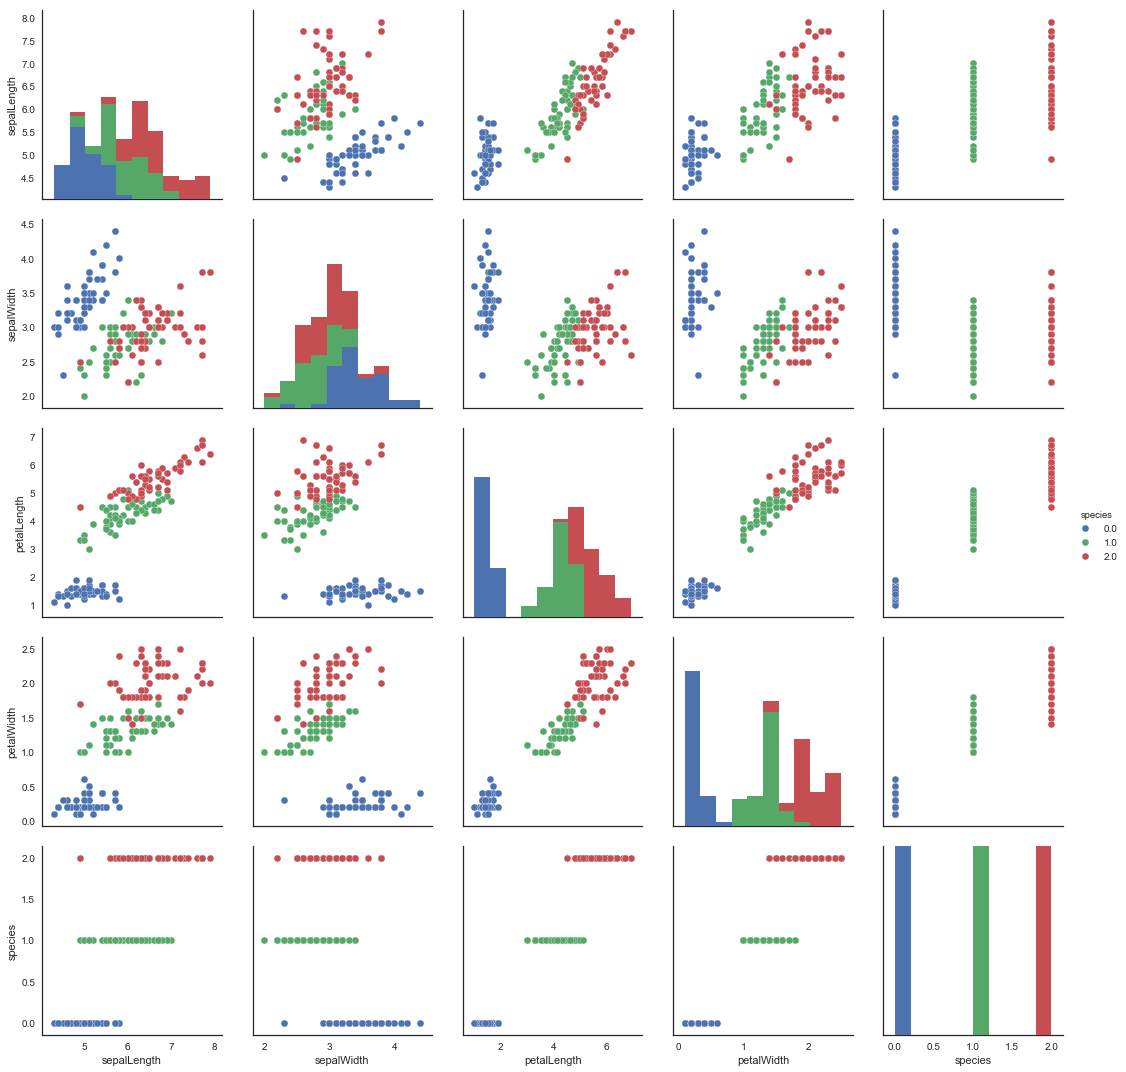

In [21]:
sns.pairplot(data=df, hue='species', size=3)

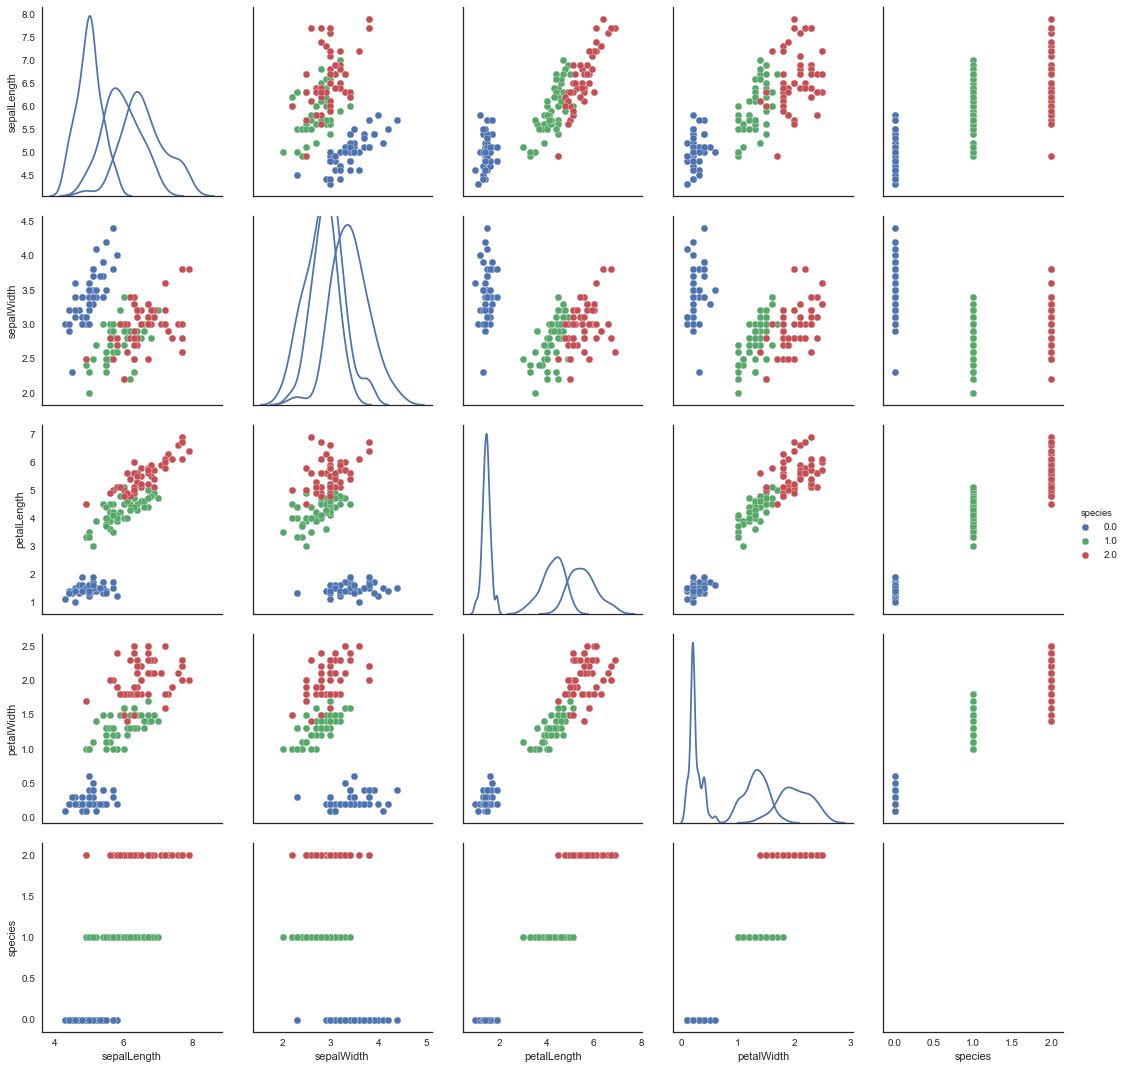

In [22]:
sns.pairplot(df, hue='species', size=3, diag_kind='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11fca2080>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x121aafa58>]], dtype=object)

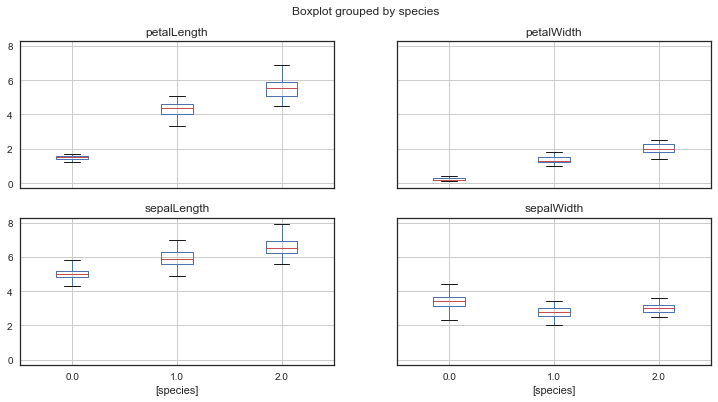

In [23]:
df.boxplot(by='species', figsize=(12, 6))

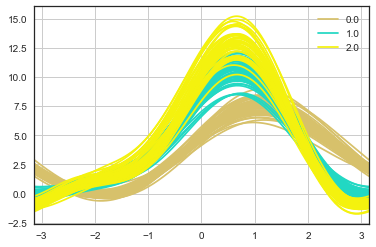

In [24]:
from pandas.tools.plotting import andrews_curves
andrews_curves(df, 'species')

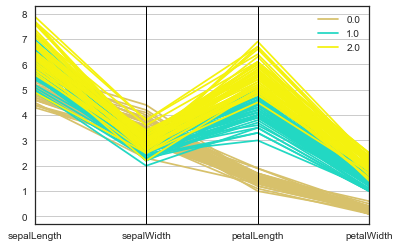

In [25]:
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(df, 'species')

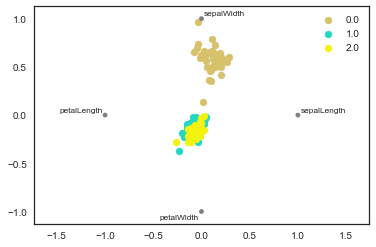

In [26]:
from pandas.tools.plotting import radviz
radviz(df, 'species')

## Using Scikit-Learn

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier

In [29]:
X = df.drop('species', axis=1)
y = df.species
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)
print(X_train.head())
print(y_train.head())
print(X_test.head())
print(y_test.head())

    sepalLength  sepalWidth  petalLength  petalWidth
99          5.7         2.8          4.1         1.3
35          5.0         3.2          1.2         0.2
87          6.3         2.3          4.4         1.3
5           5.4         3.9          1.7         0.4
10          5.4         3.7          1.5         0.2
99    1.0
35    0.0
87    1.0
5     0.0
10    0.0
Name: species, dtype: float64
     sepalLength  sepalWidth  petalLength  petalWidth
80           5.5         2.4          3.8         1.1
45           4.8         3.0          1.4         0.3
144          6.7         3.3          5.7         2.5
110          6.5         3.2          5.1         2.0
38           4.4         3.0          1.3         0.2
80     1.0
45     0.0
144    2.0
110    2.0
38     0.0
Name: species, dtype: float64


In [30]:
piplines = {
    'l1': make_pipeline(StandardScaler(), LogisticRegression(penalty='l1', random_state=123)),
    'l2': make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', random_state=123)),
    'ab': make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=123)),
    'gb': make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=123)),
    'rf': make_pipeline(StandardScaler(), RandomForestClassifier(random_state=123))
}

In [31]:
piplines['l1'].get_params()

{'logisticregression': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l1', random_state=123, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 'logisticregression__C': 1.0,
 'logisticregression__class_weight': None,
 'logisticregression__dual': False,
 'logisticregression__fit_intercept': True,
 'logisticregression__intercept_scaling': 1,
 'logisticregression__max_iter': 100,
 'logisticregression__multi_class': 'ovr',
 'logisticregression__n_jobs': 1,
 'logisticregression__penalty': 'l1',
 'logisticregression__random_state': 123,
 'logisticregression__solver': 'liblinear',
 'logisticregression__tol': 0.0001,
 'logisticregression__verbose': 0,
 'logisticregression__warm_start': False,
 'memory': None,
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'standardscaler__copy': True,
 'standardscaler__with_mean': Tru

In [32]:
l1_hyperparams = {
    'logisticregression__C': [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3]
}
l2_hyperparams = {
    'logisticregression__C': [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3]
}

In [33]:
piplines['ab'].get_params()

{'adaboostclassifier': AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
           learning_rate=1.0, n_estimators=50, random_state=123),
 'adaboostclassifier__algorithm': 'SAMME.R',
 'adaboostclassifier__base_estimator': None,
 'adaboostclassifier__learning_rate': 1.0,
 'adaboostclassifier__n_estimators': 50,
 'adaboostclassifier__random_state': 123,
 'memory': None,
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'steps': [('standardscaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('adaboostclassifier',
   AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
             learning_rate=1.0, n_estimators=50, random_state=123))]}

In [34]:
ab_hyperparams = {
    'adaboostclassifier__learning_rate': [0.05, 0.1, 0.2],
    'adaboostclassifier__n_estimators': [50, 100,  200]
}

In [35]:
piplines['gb'].get_params()

{'gradientboostingclassifier': GradientBoostingClassifier(criterion='friedman_mse', init=None,
               learning_rate=0.1, loss='deviance', max_depth=3,
               max_features=None, max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=1, min_samples_split=2,
               min_weight_fraction_leaf=0.0, n_estimators=100,
               presort='auto', random_state=123, subsample=1.0, verbose=0,
               warm_start=False),
 'gradientboostingclassifier__criterion': 'friedman_mse',
 'gradientboostingclassifier__init': None,
 'gradientboostingclassifier__learning_rate': 0.1,
 'gradientboostingclassifier__loss': 'deviance',
 'gradientboostingclassifier__max_depth': 3,
 'gradientboostingclassifier__max_features': None,
 'gradientboostingclassifier__max_leaf_nodes': None,
 'gradientboostingclassifier__min_impurity_decrease': 0.0,
 'gradientboostingclassifier__min_impurity_split': None,
 'gradientboostingclassif

In [36]:
gb_hyperparams = {
    'gradientboostingclassifier__n_estimators': [50, 100, 200],
    'gradientboostingclassifier__learning_rate': [0.05, 0.1, 0.2],
    'gradientboostingclassifier__max_depth': [1, 3, 5]
}

In [37]:
piplines['rf'].get_params()

{'memory': None,
 'randomforestclassifier': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
             oob_score=False, random_state=123, verbose=0, warm_start=False),
 'randomforestclassifier__bootstrap': True,
 'randomforestclassifier__class_weight': None,
 'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__max_depth': None,
 'randomforestclassifier__max_features': 'auto',
 'randomforestclassifier__max_leaf_nodes': None,
 'randomforestclassifier__min_impurity_decrease': 0.0,
 'randomforestclassifier__min_impurity_split': None,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__min_weight_fraction_leaf': 0.0,


In [38]:
rf_hyperparams = {
    'randomforestclassifier__n_estimators': [50, 100, 200],
    'randomforestclassifier__max_features': ['auto', 'sqrt', 0.33]
}

In [39]:
hyperparams = {
    'l1': l1_hyperparams,
    'l2': l2_hyperparams,
    'ab': ab_hyperparams,
    'gb': gb_hyperparams,
    'rf': rf_hyperparams
}

In [40]:
fitted_models = {}
for name, pipline in piplines.items():
    model = GridSearchCV(pipline, hyperparams[name], cv=10, n_jobs=-1)
    model.fit(X_train, y_train)
    fitted_models[name] = model
    print('{0} has been fitted'.format(name))

l1 has been fitted
l2 has been fitted
ab has been fitted
gb has been fitted
rf has been fitted


In [41]:
for name, model in fitted_models.items():
    print('{0} {1}'.format(name, model.best_score_))

l1 0.9583333333333334
l2 0.9583333333333334
ab 0.925
gb 0.9583333333333334
rf 0.9583333333333334


In [42]:
from sklearn.metrics import accuracy_score

In [43]:
pred = fitted_models['gb'].predict(X_test)

In [44]:
pred[:5]

array([ 1.,  0.,  2.,  2.,  0.])

In [45]:
accuracy_score(y_test, pred)

0.96666666666666667